In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [2]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [4]:
y.backward()  # 计算出了y=2*x**2的导数，并将结果存入了x这个对象的 .grad属性中

In [5]:
x.grad  # 手动查看y.backward()记录的结果

tensor([ 0.,  4.,  8., 12.])

In [6]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()

y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [7]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()

In [8]:
x.grad.zero_()
y = x * x
u = y.detach()
# 原先是z=y*x即z=x*x*x，但是detach相当于告诉pytorch把y当作一个常数u来看
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [9]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [10]:
a = torch.randn(size=(), requires_grad=True)  # 随机生成了一个数
a

tensor(-0.6171, requires_grad=True)

In [11]:
d = f(a)
d.backward()
d

tensor(-126382.5703, grad_fn=<MulBackward0>)

In [12]:
a.grad

tensor(204800.)

In [13]:
a.grad == d / a

tensor(True)

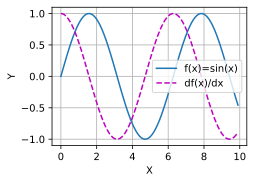

In [32]:
# 练习 5
import d2l.torch as d2l

# x.grad.zero_()
x = torch.arange(0, 10, 0.1, requires_grad=True)
y = torch.sin(x)
y.sum().backward()
d2l.plot(x.detach(), [y.detach(), x.grad], 'X','Y',legend=['f(x)=sin(x)','df(x)/dx'],)